In [1]:
import numpy as np

N = 2002
A = 10
B = 9

std_dev = np.sqrt(B)

np.random.seed(0)

data = np.random.normal(A, std_dev, N)

data[:10]

array([15.29215704, 11.20047163, 12.93621395, 16.7226796 , 15.60267397,
        7.06816636, 12.85026525,  9.54592838,  9.69034344, 11.23179551])

In [2]:
xmin = np.min(data)
xmax = np.max(data)
R = xmax - xmin

xmax, xmin, R

(19.51292431987054, 0.8615708356002205, 18.651353484270317)

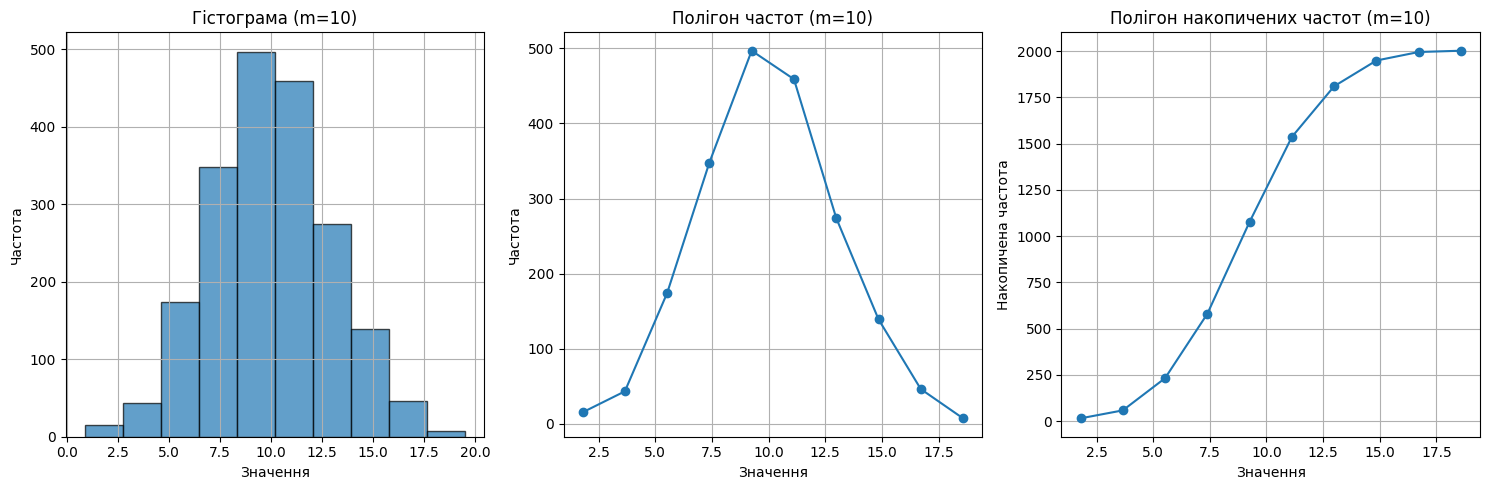

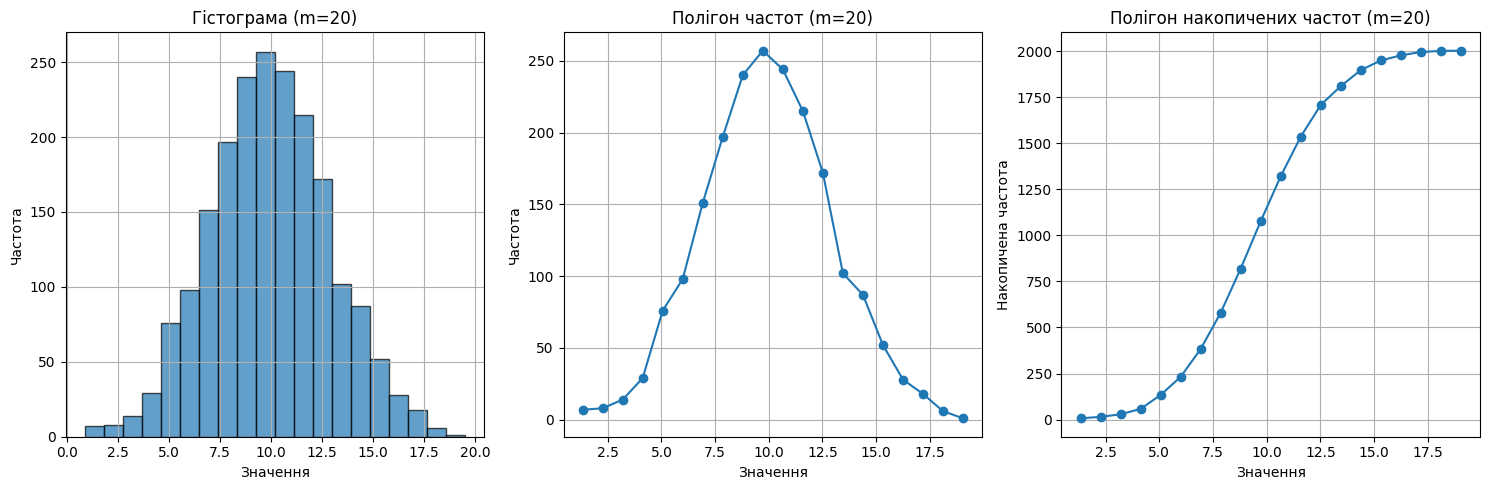

In [3]:
import matplotlib.pyplot as plt


def plot_distributions(sample, bins, title):
    plt.figure(figsize=(15, 5))

    # Гістограма
    plt.subplot(1, 3, 1)
    plt.hist(sample, bins=bins, edgecolor="black", alpha=0.7)
    plt.title(f"Гістограма ({title})")
    plt.xlabel("Значення")
    plt.ylabel("Частота")
    plt.grid(True)

    # Полігон частот
    plt.subplot(1, 3, 2)
    n, bin_edges = np.histogram(sample, bins=bins)
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    plt.plot(bin_centers, n, marker="o")
    plt.title(f"Полігон частот ({title})")
    plt.xlabel("Значення")
    plt.ylabel("Частота")
    plt.grid(True)

    # Полігон накопичених частот
    plt.subplot(1, 3, 3)
    n_cumulative = np.cumsum(n)
    plt.plot(bin_centers, n_cumulative, marker="o")
    plt.title(f"Полігон накопичених частот ({title})")
    plt.xlabel("Значення")
    plt.ylabel("Накопичена частота")
    plt.tight_layout()
    plt.grid(True)

    plt.show()


# Plot distributions for m=10 and m=20
plot_distributions(data, bins=10, title="m=10")
plot_distributions(data, bins=20, title="m=20")

In [4]:
import scipy.stats as stats

mean = np.mean(data)
variance = np.var(data)
std_dev = np.std(data)
kurtosis = stats.kurtosis(data)
skewness = stats.skew(data)

mean, variance, std_dev, R, kurtosis, skewness

(9.947725287125541,
 8.624511315568435,
 2.9367518307763825,
 18.651353484270317,
 -0.07876335841338244,
 0.04295222739558158)

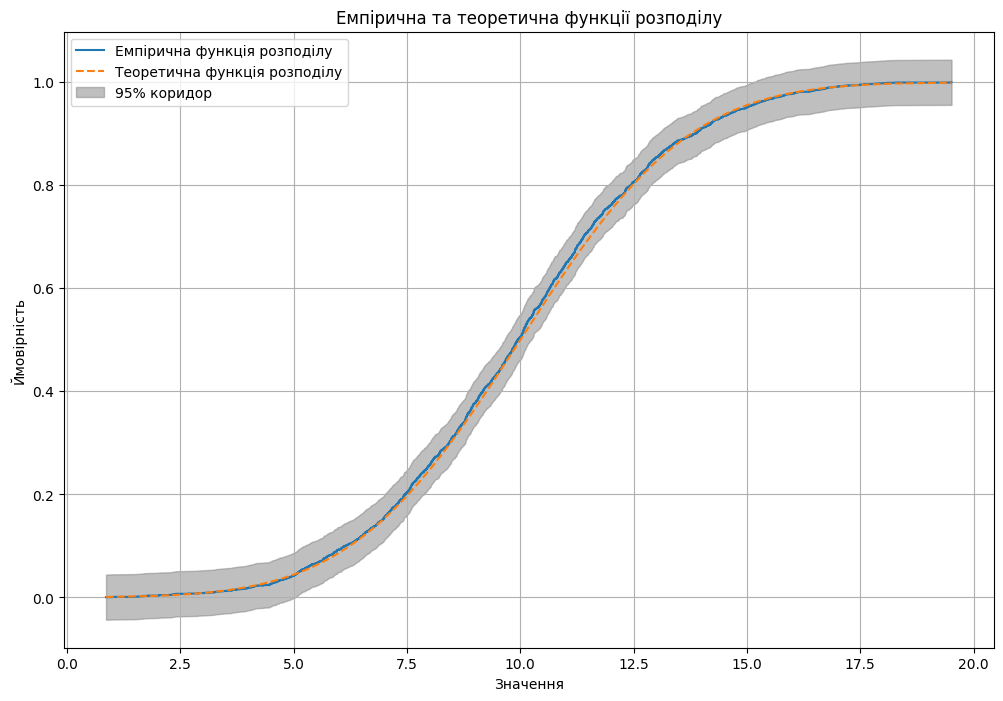

In [5]:
import scipy.stats as stats

alpha = 0.05  # 100%-95% confidence level

data = np.sort(data)

empirical_cdf = np.arange(1, N + 1) / N

theoretical_cdf = stats.norm.cdf(data, A, std_dev)

z_critical = stats.norm.ppf(1 - alpha / 2)

difference = z_critical / np.sqrt(N)
lower_bound = empirical_cdf - difference
upper_bound = empirical_cdf + difference


plt.figure(figsize=(12, 8))
plt.step(data, empirical_cdf, label="Емпірична функція розподілу", where="post")
plt.plot(data, theoretical_cdf, label="Теоретична функція розподілу", linestyle="--")
plt.fill_between(
    data,
    lower_bound,
    upper_bound,
    color="gray",
    alpha=0.5,
    label="95% коридор",
)
plt.xlabel("Значення")
plt.ylabel("Ймовірність")
plt.title("Емпірична та теоретична функції розподілу")
plt.legend()
plt.grid(True)
plt.show()